In [2]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4PytChem as t4p

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/PytChem


**Start at:** Monday 20 February 2023, 13:51:23  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# "Python in the Physical Chemistry Lab (PPCL)" in a nutshell

<div class="rq">

This Python computer lab assumes a very basic knowledge of a programming language and algorithm development.

**To run the content of a Python cell:** click on a cell to select it. Then press SHIFT+ENTER on your keyboard, or press the play button in the top left corner of this window

<img src="MiscImages/ToolbarJupyterNotebook.svg" style="margin-left:auto; margin-right:auto; display: block; width:300px" id="img_TBJN" alt="Jupyter notebook toolbar"/>

<br>
If you click on a text cell by accident, you will see the so-called markdown coding of this cell (it is closely related to the HTML language). The corresponding formatted text/images/tables will be rendered by running the cell (SHIT-ENTER or play button).
<br>
<br>
    
**Ready?** Put down your mobile phone &#x1F4F5;, please, and let's enter into the Python realm. &#x1F451;&#x1F40D;&#x1F451;

</div>

## Simple calculations

### Basic mathematical operations

In [3]:
# Every line that starts with a # character is a comment

# addition
3 + 2 # it a also possible to add a comment after a command

5

In [4]:
#This is a new cell. It is possible to define several operations or commands in a cell
# multiplication
3*2

#division
7/2

3.5

In [5]:
# As you can understand, only the result of the last operation is shown in Jupyter notebooks' cells
# Let's use the print command to see the outcome of each operation
print(3*2)
print(7/2)

6
3.5


<div class="rq">

**It's not very convenient to print operations, isn't it?** &#x1F615; This '*last operation show-up*' is specific to Jupyter Notebooks.

There is actually a trick that consists in importing a so-called `InteractiveShell` and then to setup a config option
</div>

In [6]:
#these two lines can be added at the beginning of a Jupyter notebook if you find this behavior more convenient
# !! this configuration will be applied from the next executed cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
3*2
7/2

#Euclidean division - or division with remainder
7//2 #quotient
7%2  #remainder

#exponent
10**2
3**(3/2)
(3**3)**(1/2)

6

3.5

3

1

100

5.196152422706632

5.196152422706632

<div class="intro">

Now we want to use basic functions such as sine, cosine, logarithm, exponential, etc... Let's start first with the sine function, aka `sin`

</div>

In [8]:
sin(10)

NameError: name 'sin' is not defined

<div class="rq">

`name 'sin' is not defined` !!??
    
**What the hell! This basic calculator is crap &#x1F4A9;!!???** Not exactly. But we need to use a math library that knows all the usual math functions. To do this, we need to import the libraries at some point in the python code, before calling the function
    
There are two main mathematical libraries: `math` and `numpy`.
    
Let's compare them in the next Python cell

</div>

In [9]:
import math
import numpy as np #np is now a shortcut for numpy

#Hopefully, both functions will give the same values
math.sin(3.1416/2)
np.sin(3.1416/2)

# by the way, the pi number is not known by default, it must be called either from the math or numpy libraries
math.pi
np.pi

#let's now calculate the sine of pi. You can of course mix functions and variables from different libraries
math.sin(math.pi/2)
math.sin(np.pi/2)
np.sin(math.pi/2)
np.sin(np.pi/2)

0.9999999999932537

0.9999999999932537

3.141592653589793

3.141592653589793

1.0

1.0

1.0

1.0

<div class="rq">

**What is the best choice between `math` and `numpy`?** It depends. `math.sin` works on a single number, whilst the numpy version works on numpy arrays and is tremendously faster due to the benefits of vectorization. For the moment, this notion of arrays may seem obscure to you, but we will soon introduce them, together with lists.
    
All mathematical functions available in `numpy` are listed on [this webpage](https://numpy.org/doc/stable/reference/routines.math.html#), whereas those available in the `math` library are listed [here](https://docs.python.org/3/library/math.html). The `math` library is actually a module of the [Python Standard Library](https://docs.python.org/3/library/index.html#the-python-standard-library).

</div>

### Variables

<div class="intro">
They are useful if you want to store a number to use later in another calculation.
</div>

In [10]:
c = 2*3 #the result of the operation will not be displayed. You must use print to do so
print(c)

# Let's now use a variable to perform several celsius to kelvin conversions
C2K = 273.15 #Don't make a mistake here, or all your calculations will be wrong
C2K+25
C2K+150
C2K-10

6


298.15

423.15

263.15

<div class="rq">

An alternative would be to systematically type in the 273.15 conversion factor or copy and paste its value every time you need it. This is a bad idea. In such a situation it is strongly recommended to use variables

</div>

In [11]:
#let's use again the C2K conversion factor

c2K + 1047.3

NameError: name 'c2K' is not defined

<div class="rq">

what is actually illustrated here is that the `c2K` variable is unknown, as opposed to `C2K`. Yes, in Python **upper-case and lower-case letters are not the same**

</div>

In [12]:
C2K + 1047.3

1320.4499999999998

<div class="intro">

Let's now use variables to apply the Law of Mass Action to the calculation of equilibrium constants. We introduce it by using a general chemical reaction equation in which reactants A and B react to give products C and D:
    
*a*A + *b*B = *c*C + *d*C
    
The mass action law states that if the system is at equilibrium at a given temperature *T*, then the following ratio is a constant, the so-called equilibrium constant *K*.

$$\frac{[\mathrm{C}]_\mathrm{eq}^c [\mathrm{D}]_\mathrm{eq}^d}{[\mathrm{A}]_\mathrm{eq}^a [\mathrm{B}]_\mathrm{eq}^b}=K$$

Another useful quantity if the so-called Gibbs free energy change of the reaction, $\Delta_rG°$, that is directly related to the equilibrium constant by to the following equation:
    
$$\Delta_rG° = -RT \ln K(T)$$
    
where *R* is the ideal gas constant, which is exactly 8.31446261815324 J⋅K$^{-1}$⋅mol$^{-1}$
    
There are several interests in calculating $\Delta_rG°$, one of them being that its sign can be used to predict the ratio of products to reactants:
    
- if $\Delta_rG°$ < 0, then $K$ > 1 ⟺ products are favored over reactants at equilibrium
- if $\Delta_rG°$ > 0, then $K$ < 1 ⟺ reactants are favored over products at equilibrium
- if $\Delta_rG°$ $\sim$ 0, then $K$ $\sim$ 1 ⟺ the amount of products will be roughly equal to the amount of reactants at equilibrium

</div>

<br>
    
<div class="app">

The decomposition reaction of N$_2$O$_4$ to NO$_2$ can be summarized as N$_2$O$_4$ = 2NO$_2$.

Starting, at 25°C, from [N$_2$O$_4$]$_0$ = 0.0500 mol.L$^{-1}$, the N$_2$O$_4$ mixtures at equilibrium is found to be [N$_2$O$_4$]$_\mathrm{eq}$ = 0.0417 mol⋅L$^{-1}$ and [NO$_2$]$_\mathrm{eq}$ = 0.0165 mol.L$^{-1}$.

**1.** Calculate *K* at 25°C.

**2.** Then calculate $\Delta_rG°$ for this reaction (hint: the natural logarithm can be either calculated by the `np.log` or `math.log` functions).
</div>

In [13]:
#very basic (ugly) calculator way
# Question 1
0.0165**2/0.0417
# Question 2 (the values for R and for 0.0165**2/0.0417 are cut and pasted in the next line)
-8.31446261815324*298.15*np.log(0.0065287769784172665)

#basic algorithmic way
# Question 1
CP = 0.0165 #as concentration of product
CR = 0.0417 #as concentration of reactant
K = CP**2/CR
# Question 2
R = 8.31446261815324 # J K−1 mol−1
T = C2K + 25
DG = -R*T*math.log(K)
print(K, DG)

0.0065287769784172665

12472.9606592818

0.0065287769784172665 12472.9606592818


### Physical and mathematical constants

<div class="intro">

The "algorithmic" is obviously less straightforward than the "calculator" way. **Yet, such longer piece of code is to be preferred.**
- First, it is more readable. So if you save your notebook as a kind of well-organized calculation spreadsheet, you can later on use the same code and variables, or redo the same application
- Secondly, it can be generalized in terms of a function that could be used several times. This is the purpose of the following subsection, which consists of defining a function with *T* and *K* as arguments, that will return $\Delta_rG°$
    
But before that, it is time to introduce an interesting module that is worth to be known by physicists and chemists, the `constants` module of the SciPy library, where SciPy is is an open-source library for mathematics, science, and engineering. 

The list of constants is available [online](https://docs.scipy.org/doc/scipy/reference/constants.html). The code below illustrates how to call the module, and how to use the physical and mathematical constants.

</div>

In [14]:
import scipy.constants as sc
print(sc.value("molar gas constant"))
print(sc.unit("molar gas constant"))

print(sc.zero_Celsius) # it is not defined as a constant in SciPy, but with units

# the previous code becomes:
# Question 1
CP = 0.0165 #as concentration of product
CR = 0.0417 #as concentration of reactant
K = CP**2/CR
# Question 2
R = sc.value("molar gas constant") #the sc.unit("molar gas constant") command let us know that it is defined in the SI
C2K = sc.zero_Celsius
T = C2K + 25
DG = -R*T*math.log(K)
print(K, DG)

8.314462618
J mol^-1 K^-1
273.15
0.0065287769784172665 12472.96065905192


### Formatted printing and significant figures

<div class="intro">

As seen in the previous lines, we can easily print things to the screen. It is also possible to use "" and commas to print text, as done below:
    
</div>

In [15]:
print("K = ",K,"   DeltaG = ",DG)

K =  0.0065287769784172665    DeltaG =  12472.96065905192


<div class="intro">

The `print` command displays as many digits as Python's precision allows: floating point numbers are represented with a precision of up to 15 significant digits. So how can you manage significant figures? Well, it is recommended to store floating point numbers in variables with the highest precision of Python, and to print them with the desired precision.

To do so, we can specify how many significant figures we want overall, or we can specify how many significant figures we want after the decimal point. Let's start with the former, using the so-called f-string formatting of the `print` command. To specify a level of precision, we need to use a colon (:), followed by a decimal point, along with some integer representing the degree of precision. We place this inside the curly braces for an f-string, after the value we want to format.
    
What a loooooong explanation! &#x1F914; &#x1F635;&#x200D;&#x1F4AB; Let's move to the next Python cell to see that it's quite easy to understand and manage: 
    
</div>

In [16]:
print(f"K = {K:.4}  DeltaG = {DG:.4}")
print("This formatting operation actually performs rounding or converts a number in scientific notation, with the appropriate number of digits")

K = 0.006529  DeltaG = 1.247e+04
This formatting operation actually performs rounding or converts a number in scientific notation, with the appropriate number of digits


<div class="intro">
So how do we specify 4 decimal places? We just need to add an `f`, which means that we want our floatting point number displayed as a "fixed point number":
</div>

In [17]:
print(f"K = {K:.4f}  DeltaG = {DG:.4f}")

K = 0.0065  DeltaG = 12472.9607


## Lists and arrays

### Lists

<div class="intro">
    
A list is a data structure that's built into Python and holds a collection of items. Their main characteristics are:

- list items are enclosed in square brackets, like this: [item1, item2, item3]
- lists are ordered – *i.e.* the items in the list appear in a specific order. This enables us to use an index to access to any item
- it is possible to add or remove items after a list's creation
- Elements can be of different data types: you can combine strings, integers, and objects in the same list

Lists can be the preferred choice if you need to store a relatively short sequence of items and you don't plan to do any mathematical operations with it.

Let's first start with a list that contains only integers. It will also be shown how to add new items to a list and how to remove an item:
</div>

In [18]:
my_list = [3, 2, 10, 12, 3, 1]
print("my_list = ",my_list)
my_list.extend([6, 2, 8])
print("my_list extended = ",my_list)
del my_list[1]
print("my_list after deletion of item [1] = ",my_list)

my_list =  [3, 2, 10, 12, 3, 1]
my_list extended =  [3, 2, 10, 12, 3, 1, 6, 2, 8]
my_list after deletion of item [1] =  [3, 10, 12, 3, 1, 6, 2, 8]


<div class="rq">

It's actually the second item that has been deleted. **It's because the list index starts with 0 in Python**. So, the index value of the first item is 0, that of the second item is 1, etc...

</div>

### Arrays

<div class="intro">
    
An array is also a data structure that stores a collection of items. Like lists, arrays are enclosed in square brackets, they are ordered, and they can be modified

But the array's ability to store different data types is less obvious, it depends on the kind of array used.

To use arrays in Python, you need to import either an `array` module or the `NumPy` package, which is the fundamental package for numerical computing in Python. `NumPy` arrays support different data types. Let's give an example:
</div>

In [19]:
import numpy as np #np is now a shortcut for numpy

my_array = np.array([3, 2, 10, 12, 3, 1])
print("my_array = ",my_array) #you will see that items are not separated with commas
print("item 1 of my_array = ",my_array[1])
my_array = np.append(my_array,[55, 147, 309])
print("my_array = ",my_array)

my_array =  [ 3  2 10 12  3  1]
item 1 of my_array =  2
my_array =  [  3   2  10  12   3   1  55 147 309]


<div class="rq">

Arrays are great for numerical operations, whereas lists cannot directly handle math operations. **An important feature is that operations can simultaneously be applied to all array elements**. Let's illustrate this: 

</div>

In [20]:
array2 = 2*my_array - 1
print("array2 = ",array2)

array2 =  [  5   3  19  23   5   1 109 293 617]


In [21]:
my_array = np.array([3, 2, 10, 12, 3, 1, "Albert Einstein"])
print(my_array)
array2 = 2*my_array - 1

['3' '2' '10' '12' '3' '1' 'Albert Einstein']


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('int64'), dtype('<U21')) -> None

<div class="rq">

The last cell execution returned the following error. Why? It's because `my_array` contains both numbers (`int64` type, as integer) and strings (`<U21` type, as unicode). This `2*my_array` command generates an error, since it is not possible to do numerical applications on such hybrid arrays.


```Python
---------------------------------------------------------------------------
UFuncTypeError                            Traceback (most recent call last)
Input In [20], in <cell line: 3>()
      1 my_array = np.array([3, 2, 10, 12, 3, 1, "Albert Einstein"])
      2 print(my_array)
----> 3 array2 = 2*my_array - 1

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('int64'), dtype('<U21')) -> None
```

</div>

### How to easily read arrays from text files in Python?

<div class="intro">
    
Data files can be loaded into a Python code in several ways. We will concentrate here on the reading of data saved as columns under the so-called CSV format, using the `genfromtxt` function of the NumPy library. 

CSV stands for "comma-separated values". A CSV file is a delimited text file that uses a comma, or any other delimiter such a ; or TAB, etc... to separate values.
A CSV file consists of one or more lines which consists of one or more values separated by commas. In addition, all the lines of a CSV file have the same number of values.

Typically, you use a CSV file to store tabular data in plain text. The CSV file format is quite popular and supported by many software applications such as Microsoft Excel and Google Spreadsheet.read CSV files.
    
</div>

<br>
<div class="app">
    
Let's now have a look at the content of a file named `VolcanoPlot-woA.csv`, contained in the `MiscData/` folder. If you open it with an editor, or directly with this Jupyter tool, you will see
```
DGads;log i0
-12.876146;-6.5492228
-8.5595008;-6.7668394
-9.9983824;-5.7029361
-6.3089424;-5.1830743
-6.272048;-4.9775475
-7.4526688;-2.8013817
-3.3573904;-2.91019
-2.3243472;-3.4784111
-2.1029808;-2.5958549
0.6272048;-3.611399
1.8816144;-4.9654577
4.3904336;-5.2314335
10.441115;-6.3316062
11.806208;-7.5889465
17.008318;-7.4075993
```

The CSV file has a header row that includes the titles of each column. Each row in the file contains the same number of cells, which are separated by semicolons. 

You can also import it in a spreadsheet program, that will display:
<img src="MiscData/VolcanoPlot-SpreadSheet-woA.png" style="margin-left:auto; margin-right:auto; display: block; width:220px" id="img_VolcanoPlotData" alt="Volcano plot data for the hydrogen reaction"/>

**1.** Use the `genfromtxt` function of `numpy` to read the content of `MiscData/VolcanoPlot-woA.csv`. Don't forget to remove the first line, *i.e.* the header, and to setup the appropriate delimiter.

**2.** Use again `genfromtxt` function of `numpy` to read the content of `MiscData/VolcanoPlot-woA.csv`. Now setup the `unpack` option to `True`. If True, the returned array is transposed, so that each column may be returned using, for example `x, y, z = genfromtxt(...)` for a 3-column CSV datafile.
</div>

In [22]:
#Q1
data = np.genfromtxt("./MiscData/VolcanoPlot-woA.csv",delimiter=";",skip_header=1)
print(data)

[[-12.876146   -6.5492228]
 [ -8.5595008  -6.7668394]
 [ -9.9983824  -5.7029361]
 [ -6.3089424  -5.1830743]
 [ -6.272048   -4.9775475]
 [ -7.4526688  -2.8013817]
 [ -3.3573904  -2.91019  ]
 [ -2.3243472  -3.4784111]
 [ -2.1029808  -2.5958549]
 [  0.6272048  -3.611399 ]
 [  1.8816144  -4.9654577]
 [  4.3904336  -5.2314335]
 [ 10.441115   -6.3316062]
 [ 11.806208   -7.5889465]
 [ 17.008318   -7.4075993]]


In [23]:
#Q2
DG, logi0 = np.genfromtxt("./MiscData/VolcanoPlot-woA.csv", delimiter=";", skip_header=1, unpack=True)
print("DeltaG = ",DG)
print("log(i0) = ",logi0)

DeltaG =  [-12.876146   -8.5595008  -9.9983824  -6.3089424  -6.272048   -7.4526688
  -3.3573904  -2.3243472  -2.1029808   0.6272048   1.8816144   4.3904336
  10.441115   11.806208   17.008318 ]
log(i0) =  [-6.5492228 -6.7668394 -5.7029361 -5.1830743 -4.9775475 -2.8013817
 -2.91019   -3.4784111 -2.5958549 -3.611399  -4.9654577 -5.2314335
 -6.3316062 -7.5889465 -7.4075993]


## Functions and plotting, with a word about indentation

**Do you want to plot a function?** Then you need to know how to define it. Among other applications


### Definition of a function

<div class="intro">

A function is a piece of code that we want to use multiple times but don't want to write out each time. This typically involves taking some input, manipulating the input and returning an output. It only runs when it is called. In Python a function is defined using the `def` keyword:
```Python
def my_function1(message):
  print(message)
```

To call a function, use the function name followed by parenthesis. Arguments are specified inside the parentheses. You can add as many arguments as you want, just separate them with a comma.

```Python
my_function1("Hello from a function")
```

This call will simply return `My message is:  Hello from a function`.

Let's implement it:
</div>

In [24]:
def my_function1(message):
    print("My message is: ",message)
print("This is outside the function")
my_function1("Hello from a function")

This is outside the function
My message is:  Hello from a function


<div class="rq">

The `print("My message is: ",message)` statement belongs to an **indented block**, consisting in this case of one statement. The indentation tells Python which statements are in the function, and which are outside it.

In the main block of the previous cell, you first print  `This is outside the function` and then you call  `my_function1`, that has been previously defined at the beginning of this cell.
</div>

To let a function return a value, use the return statement:

```
def my_function2(a,b,x):
  return a*x+b
```

For example, the call `my_function2(2,1,3)` will return `7`.

You can either print it (`print(my_function2(2,1,3))`) or store it in a variable (`y = my_function2(2,1,3)`).

In [25]:
def my_function2(a,b,x):
  return a*x+b
y = my_function2(2,1,3)
print(y)

7


<div class="app">

We are now going to define a function that will return the standard change in free energy of a reaction, $\Delta_rG°$, as a function of the equilibrium constant (*K*) and the temperature (*T*):
$$\Delta_rG° = -RT \ln K(T)$$

The function will start with a docstring section. They are documentation strings that are used as comments and they are added below a function or module to describe what it does.
</div>

In [26]:
def DrG(K,t):
    # this is a docstring
    """
    This function returns the standard change in free energy of a reaction, ΔrG°
    
    input:
        - K = equilibrium constant
        - t = temperature in Celsius
    output:
        - ΔrG° in J K-1 mol-1
    prints/saves: nothing
    """ #end of the docstring
    import numpy as np
    import scipy.constants as sc
    R = sc.value("molar gas constant") #the sc.unit("molar gas constant") command previously applied let us know that it is defined in the SI
    C2K = sc.zero_Celsius
    T = C2K + t
    return -R*T*np.log(K)

CP = 0.0165 #as concentration of product
CR = 0.0417 #as concentration of reactant
K = CP**2/CR
print(f"K = {K:.4}  DeltaG = {DrG(K,25):.4}")

K = 0.006529  DeltaG = 1.247e+04


<div class="rq">
    
<span style="color:red">**Why a docstring section?**</span> **<u>It's part of a good practice</u>** &#x1F44C;
    
There is no obligation. But let's suppose that you have stored the previous `DrG` function in an external python library. You do not remember how `DrG` exactly works and which arguments it needs. Probably an equilibrium constant and a temperature, but in which order? Must the temperature be given in Celsius or directly in Kelvin? Whats is the unit of the returned DrG value? Such answers can be obtained thanks to a well-written `docstring` section:
- it helps users to properly address a function
- it also helps the main coder remember the function of any code after a long time
- it also helps other coders who want to work on the same project
- **could it be relevant in the Physical Chemistry lab?** Of course. First of all for the main developer, that is you. But let's also assume that you **develop a collaborative lab notebook** in the framework of a **lab project**. An accurate and concise `docstring` section will be of utmost importance to make the notebook and its functions usable and improvable by all group members.

As a user, you just have to type `help(method)` in order to know how to use it:
</div>

In [27]:
help(DrG)

Help on function DrG in module __main__:

DrG(K, t)
    This function returns the standard change in free energy of a reaction, ΔrG°
    
    input:
        - K = equilibrium constant
        - t = temperature in Celsius
    output:
        - ΔrG° in J K-1 mol-1
    prints/saves: nothing



<div class="app">

**1.** Define an array `K` with the following equilibrium constants values: 0.05, 0.1, 0.5, 1, 5, 10, 30, 50, 100, 500, 1000

**2.** Use the previously defined `DrG` function to calculate all corresponding $\Delta_rG°$ at once
    
</div>

In [28]:
import numpy as np #np is now a shortcut for numpy

K = [0.05, 0.1, 0.5, 1, 5, 10, 30, 50, 100, 500, 1000] # we first define a list with various values of the equilibrium constant
K = np.array(K) # the list is converted into a numpy array
print(DrG(K,25)) # DG returns an array 

[  7426.2915782    5708.00950243   1718.28207577     -0.
  -3989.72742666  -5708.00950243  -8431.42215818  -9697.73692909
 -11416.01900486 -15405.74643152 -17124.02850729]


### Plotting

<div class="intro">
    
There are no plotting functions in the Python Standard Library Python, so we have to import a module for this task. The most widely used one is the `pyplot` module of the [Matplotlib library](https://matplotlib.org/stable/tutorials/introductory/quick_start.html), which is a widely used and useful plotting library. Simple plots are then easy to create and customize. 
</div>
<br>
<div class="app">


Let's start by plotting $\Delta_rG°(25)$ as a function of *K*
</div>

Text(0.5, 0, 'equilibrium constant K')

Text(0, 0.5, 'Gibbs free energy')

Text(0.5, 1.0, 'My first graph: DrG° as a function of K, at 25°C')

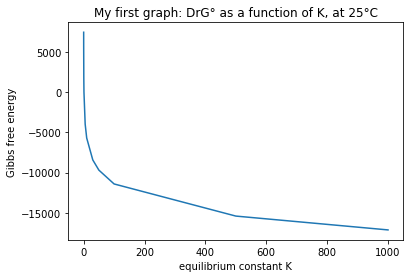

In [29]:
# import the required module
import matplotlib.pyplot as plt

# plotting the points 
plt.plot(K, DrG(K,25))
  
# naming the x axis
plt.xlabel('equilibrium constant K')

# naming the y axis
plt.ylabel('Gibbs free energy')
  
# giving a title to my graph
plt.title('My first graph: DrG° as a function of K, at 25°C')
  
# function to show the plot
plt.show()

In [30]:
#set the interactivity parameter to 'none'. Function calls will display nothing from now on
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

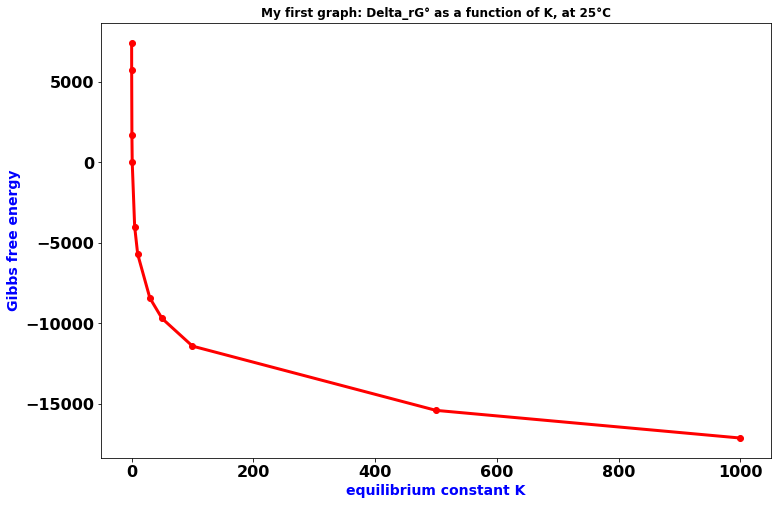

In [31]:
#this sets the figure size
plt.figure(figsize=(12,8))

# plot the points 
plt.plot(K, DrG(K,25), color='r', linewidth=3, marker="o")

# name the x and y axis
plt.xlabel('equilibrium constant K',size=14,fontweight='bold',color='blue')
plt.ylabel('Gibbs free energy',size=14,fontweight='bold',color='blue')
# set tick labels font size
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
# give a title to the graph
plt.title('My first graph: Delta_rG° as a function of K, at 25°C',fontweight='bold')

# it is also possible to save a plot, if you want to insert it in a document (text, presentation, ...)
plt.savefig('./FiguresCreatedInNotebooks/fig1-Pyt4PC.png',dpi=300,transparent=True)

# show the plot. The image is then closed and freed from memory. This is why plt.savefig or any other option must be called before plt.show
plt.show()


<div class="app">

Let's now work again on the `VolcanoPlot-woA.csv` datafile, contained in the `MiscData/` folder. According to its header, this file contains a first column named DGads and a second one named log i0. Explaining in details what these properties are would be far beyond the scope of this notebook. Let's just say that what is reported here is related to the electrocatalytic production of molecular hydrogen at a metal electrode. The $\log(i_0)$ property is the exchange current density, it is related the quantity of hydrogen produced. DGads is the so-called Gibbs energy of adsorption of hydrogen at the electrode, $\Delta_\mathrm{ads}G°$. Each ($\Delta_\mathrm{ads}G°$, $\log(i_0)$) couple characterizes the efficiency of a specific metal electrode. The plot is expected to look like a **Sabatier-like volcano**, with the best electrode materials on the peak. Well. It's time to bring this digression to an end.
    
</div>

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

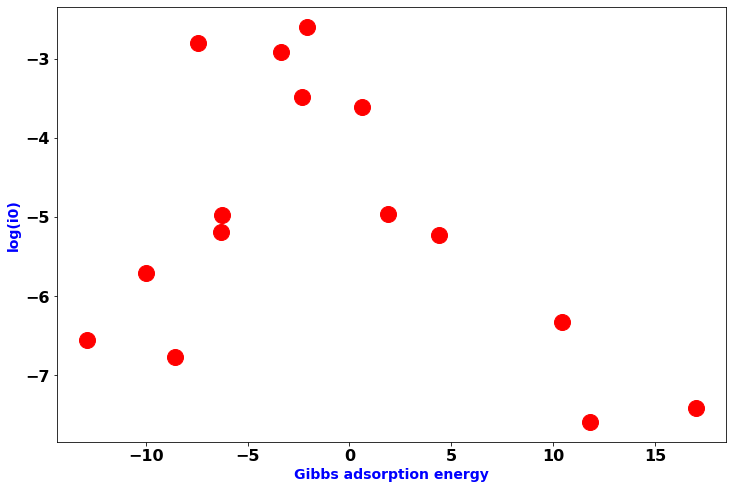

In [33]:
# import the required module
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(DG, logi0, color='r', linestyle='', marker="o",markersize=16)
plt.xlabel('Gibbs adsorption energy',size=14,fontweight='bold',color='blue')
plt.ylabel('log(i0)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.show()

<div class="rq">

**Hey!** It barely looks as a volcano &#x1F30B;! &#x1F914;
    
</div>
<br>
<div class="intro">

Well, the volcano plot is a somewhat idealized concept, not to mention the experimental uncertainties on $\Delta_\mathrm{ads}G°$ and $\log(i_0)$. To highlight the volcano shape of these data, we need to **smooth** them. The idea is to create an approximating function that attempts to capture important patterns in the data, while leaving out noise. We will use for that the Savitzky–Golay digital filter available in a library called **SciPy**. This library provides fundamental algorithms for scientific computing in Python. One of its modules, `scipy.signal` is a signal processing toolbox that currently contains some filtering functions. The Savitzky–Golay digital filter, `savgol_filter`, is part of the `scipy.signal` toolbox.
    
</div>
<br>
<div class="app">

Compare the next cell with the previous one to find the differences between them.
</div>

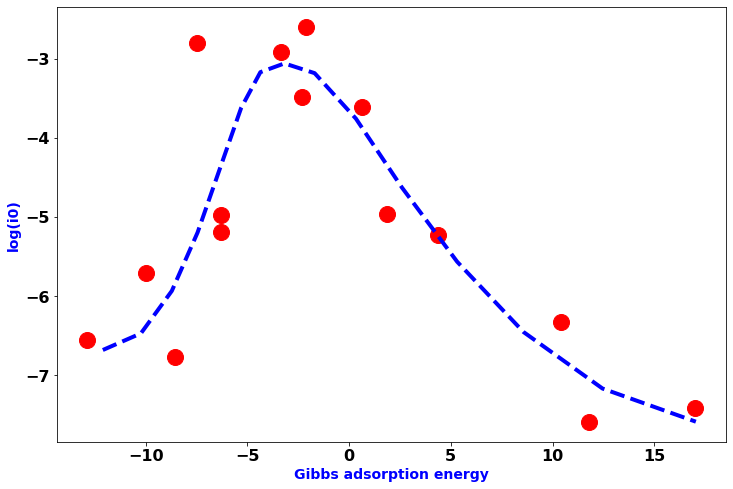

In [34]:
from scipy.signal import savgol_filter
DGhat, logi0hat = savgol_filter((DG,logi0), 11, 3)  # These two parameters are the length of the filter window,
                                                    # Followed by the order of the polynomial used to fit the samples
                                                    # We have played a bit to find a combination of parameters that nicely smooths the data

plt.figure(figsize=(12,8))
plt.plot(DG, logi0, color='r', linestyle='', marker="o",markersize=16) # plot of the experimental (DG, logi0) couple 
plt.plot(DGhat, logi0hat, color='b', linestyle='--', linewidth=4)  # plot of the smoothed data, displayed as a dashed line
plt.xlabel('Gibbs adsorption energy',size=14,fontweight='bold',color='blue')
plt.ylabel('log(i0)',size=14,fontweight='bold',color='blue')
plt.ylabel('log(i0)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.show()

<div class="rq">

The volcano shape of the ($\Delta_\mathrm{ads}G°$, $\log(i_0)$) data is somewhat more convincing now, isn't it? &#x1F4AA;
    
**Take-home message**: there is probably a method or function somewhere in a general python library that meets your needs and that is worth using instead of developing your own code. Just ask your favorite search engine... And try to find a simple tutorial, not a one written ~~by a nerd~~ by a pythonic programmer &#x1F913;. At least not in the first place.
    
</div>

## Model fitting
### The linear regression case

<div class="intro">
    
Regression is a basic and commonly used type of predictive analysis, that can be applied to various areas in business and academic studies. It predicts the value of unknown data by using another related and known data value. **Linear** regression mathematically models the unknown (or dependent) variable and the known (or independent) variable as a linear equation.

In this context, a lot of chemical analysis relies on our ability to fit a line as close as possible to a whole dataset. If necessary and if possible, an equation, hereafter called the model, is linearized. This the case of the Arrhenius equation, widely used in chemical kinetics:
$$k=A\exp(-E_a/RT)$$

where, *k* is the rate constant at temperature *T*, *A* is the pre-exponential factor, and *R* is the ideal gas constant. $E_a$ is the minimum energy molecules must possess in order to react to form a product. The following table contains *k* values experimentally measured at various temperatures *T*.
    
| Experiment | *T* / K | *k* / s$^{-1}$ |
| :---------------: |:---------------:| :---------------:|
|A|283|0.13|
|B|293|0.29|
|C|308|0.45|
|D|318|0.70|

Given the Arrhenius equation, there is an exponential relationship between *k* and *T*, and fitting the model with the data will give access to two kinetic values specific of the underlying reaction mechanism: *A* and $E_a$.

The model can be easily transformed into a linear equation by considering its logarithm:

$$\ln (k) = -E_a/RT + \ln (A) $$

The plot of $\ln (k)$ as a function of $\frac{1}{RT}$ is expected to be a line, $-E_a$ being its slope and $\ln (A)$ its *y*-intercept.

</div>
<br>
<div class="rq">

**Do not make a confusion between smoothing and model fitting**. Let's adapt what is said in [Wikipedia](https://en.wikipedia.org/wiki/Smoothing) on this topic: curve fitting often involves the use of an **explicit function form** for the result, whereas the immediate results from smoothing are the "smoothed" values with no final explicit functional form
</div>

<div class="app">

Linear regression is illustrated in the next python cell, using the `linregress` method of the `stats` module of the `scipy` library. Accordinf to the [online manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), `linregress` returns the slope, the intercept, and the *R*-value, which square  is equal to the coefficient of determination $R^2$.

**1.** Define two arrays, `Texp` and `kexp`, with the experimental data measured in experiments A-D.
    
**2.** Plot $\ln(k_\mathrm{exp})$ as a function of $\frac{1}{RT_\mathrm{exp}}$. Yet, the experimental uncertainty involves that the 4 couples are not perfectly aligned. Plot $\ln(k_\mathrm{exp})$ as a function of $\frac{1}{RT_\mathrm{exp}}$ using markers only, *i.e.* do not connect data with lines.
</div>

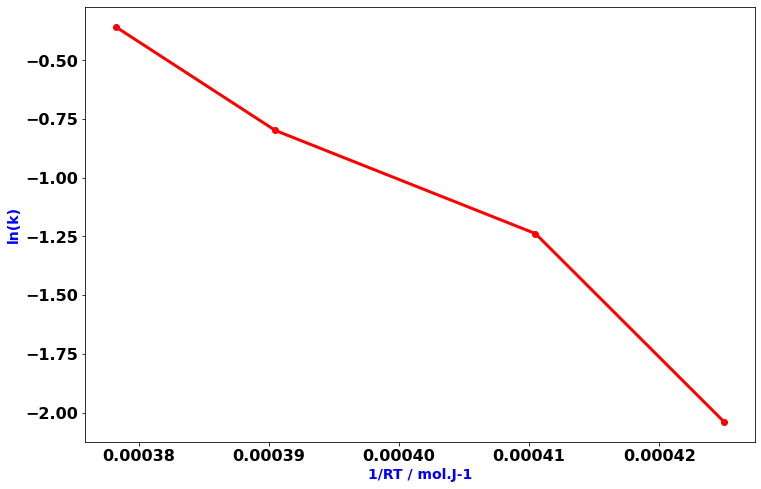

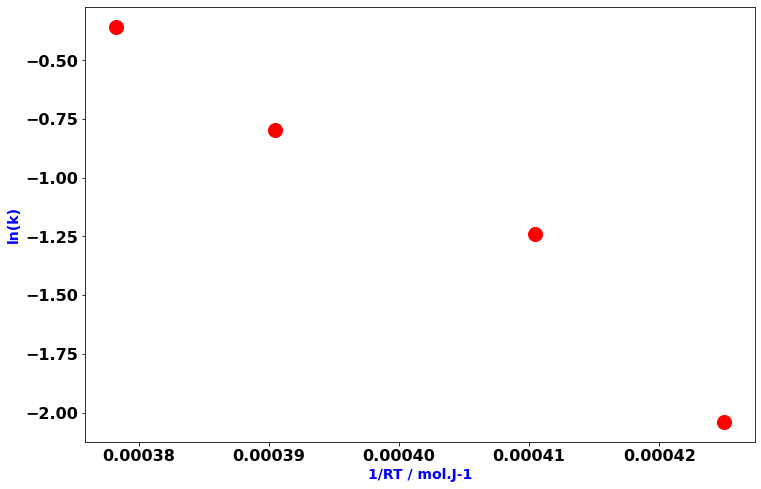

In [35]:
import numpy as np
#Q1
Texp = np.array([283,293,308,318])
kexp = np.array([0.13,0.29,0.45,0.70])

#Q2
import scipy.constants as sc
R = sc.value("molar gas constant")
RTinv = 1/(R*Texp)
lnk = np.log(kexp)

import matplotlib.pyplot as plt
#this sets the figure size
plt.figure(figsize=(12,8))

# plot the points 
plt.plot(RTinv, lnk, color='r', linewidth=3, marker="o")

# name the x and y axis
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
# set tick labels font size
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.show()

# The experimental uncertainty involves that the 4 couples are not perfectly aligned
# Let's redo the plot with only markers and no connecting line
plt.figure(figsize=(12,8))
plt.plot(RTinv, lnk, color='r', linestyle='', marker="o", markersize=14)
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.show()
#that's better. Now it's time to fit the data

<div class="app">

**3.** Use the `linregress` function of `scipy.stats` to find $E_a$ and $\ln (A)$. Evaluate the performance of this regression model with the coefficient of determination, $R^2$ (R-squared). The closer to 1 the R-squared value is, the better the model is.

**4.** $R^2$ tells how well the values fit compared to the original values. But the best way to evaluate the quality of the fit and the actual linear behavior of the data is to plot the couples of data and the fitted line on the same graph. To do that:
- first define a function `kArr` (Arr as Arrhenius) that will take the temperature $T$ and the fitted $A$ and $E_a$ parameters as arguments
- do a scatter plot $\ln(k_\mathrm{exp})$ as a function of $\frac{1}{RT_\mathrm{exp}}$, *i.e.* using the option `linestyle=''`
- superimpose on the same graph the plot of `np.log(kArr(Texp,A,Ea))` as a function of $\frac{1}{RT_\mathrm{exp}}$

**5.** Use the fitted linear model to predict the value of the rate constant *k* at *T* = 300K and at *T* = 373.15K.
</div>

In [36]:
#Q3
from scipy.stats import linregress

fitlin = linregress(x=RTinv, y=lnk)

Ea = -fitlin.slope
lnA = fitlin.intercept #lnA is a variable!!
A = np.exp(lnA)
Rscore = fitlin.rvalue

print(f"Ea  = {Ea:8.3f} J.mol-1\nA   = {A:8.3f} s-1\nR^2 = {Rscore**2:6.3f}") # \n = new line

Ea  = 33950.020 J.mol-1
A   = 270281.181 s-1
R^2 =  0.965


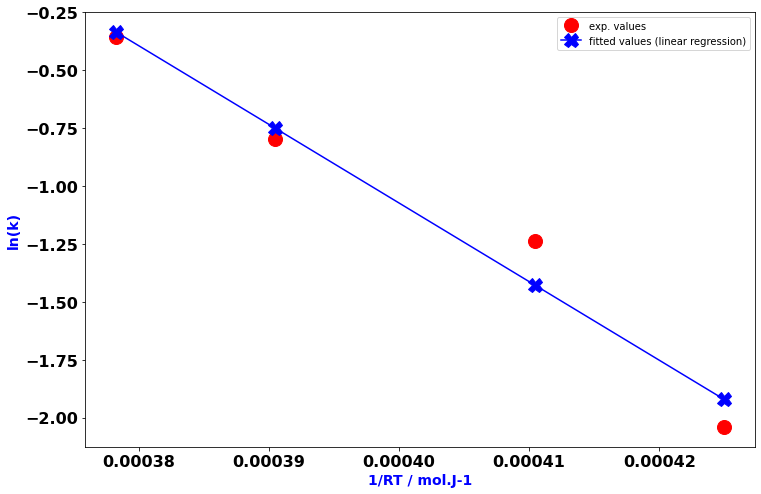

k = 0.332 at 300K
k = 4.781 at 373.15K


In [37]:
#Q4

def kArr(T,A,Ea):
    """
    input:
        - T = temperarture, in K
        - A = pre-exponental factor
        - Ea = activation energy, in J.mol-1
    returns:
        the rate constant, k, in the same unit as A
    """
    import numpy as np
    import scipy.constants as sc
    R = sc.value("molar gas constant")
    return A*np.exp(-Ea/(R*T))

kfit = kArr(Texp,A,Ea)
plt.figure(figsize=(12,8))
plt.plot(RTinv, np.log(kexp), color='r', linestyle='', marker="o", markersize=14, label="exp. values")
plt.plot(RTinv, np.log(kfit), color='b', linestyle='-', marker="X", markersize=14, label="fitted values (linear regression)")
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend()
plt.show()

#Q5

k300 = kArr(300,A,Ea)
k373 = kArr(373.15,A,Ea)
print(f"k = {k300:.3f} at 300K")
print(f"k = {k373:.3f} at 373.15K")

<div class="rq">

Given that the temperature domain of the experimental data couples is [283-318]K, the 300K value for *k* is an interpolated value, whilst the 373.15K value for *k* is extrapolated.

</div>
<br>

<div class="app">

**5.** Plot again the [$\frac{1}{RT_\mathrm{exp}}$, $\ln(k_\mathrm{exp})$] couples on a graph as well as the [$\frac{1}{RT_\mathrm{exp}}$, $\ln(k_\mathrm{Arr})$] couples.
<br>
But this time, plot the line in the [273.15, 400]K domain in order to highlight that the $k_\mathrm{Arr}$ model applies beyond the [283-318]K domain. It is suggested to use the `np.linspace` function. The `numpy` manual says that:

`np.linspace(start, stop, n)` returns *n* evenly spaced samples, calculated over the interval [*start*, *stop*]

</div>

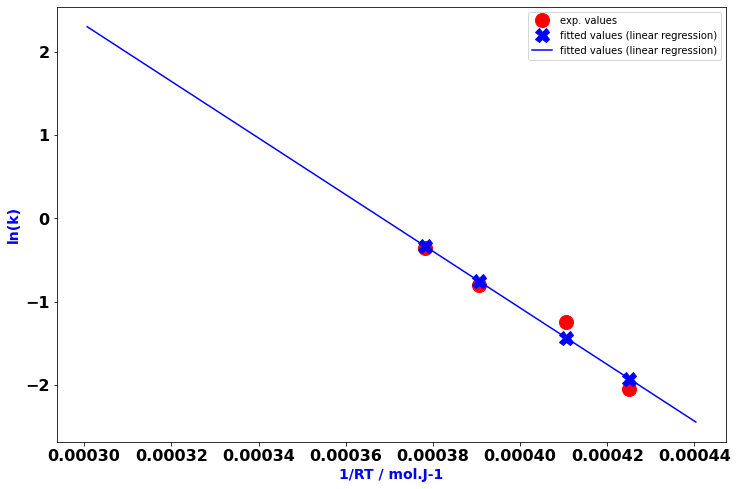

In [38]:
#Q5
T_extrap = np.array([273.15, 400]) #Two values is enough for a line, isn't it?
kfit_extrap = kArr(T_extrap,A,Ea) # a new kfit_extrap array is created, with k calculated for each temperature. Again, this is a strong advantage of the numpy library
RTinv_extrap = 1/(R*T_extrap) # ln(k) will be plotted as a function of 1/RT (ln(k) = -E_a/RT + ln(A))

plt.figure(figsize=(12,8))
plt.plot(RTinv, np.log(kexp), color='r', linestyle='', marker="o", markersize=14, label="exp. values")
plt.plot(RTinv, np.log(kfit), color='b', linestyle='', marker="X", markersize=14, label="fitted values (linear regression)")
plt.plot(RTinv_extrap, np.log(kfit_extrap), color='b', linestyle='-', marker="", markersize=14, label="fitted values (linear regression)")
plt.xlabel('1/RT / mol.J-1',size=14,fontweight='bold',color='blue')
plt.ylabel('ln(k)',size=14,fontweight='bold',color='blue')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend()
plt.show()

<div class="rq">
    
**I have the feeling that you have a question !!** &#x1F642;
    

&#x1F64B; "*Would-it be possible to directly find values for the parameters $E_a$ and $A$ of the $k(T)=\exp (-\frac{E_a}{RT})$ function that best describe the $[T_\mathrm{exp}, k_\mathrm{exp}]$ set of data?*"
    
**I knew it!**  &#x1F643; Yes, of course. This is a [nonlinear regression](https://en.wikipedia.org/wiki/Nonlinear_regression) problem. It will be introduced in the next subsection.

<div>

In [62]:
vID.end(cwd0)

**End at:** Monday 20 February 2023, 13:52:35  
**Duration:** 00:01:12 663ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>